In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"D:\Text Mining\Project\labeled_news_dataset.csv")  

df['text'] = (df['Title'].fillna('') + ' ' + df['Description'].fillna('')).str.lower()

df['Label'] = 'Unknown'
df.loc[df['text'].str.contains("ai|machine learning|artificial intelligence|automation|robot", regex=True), 'Label'] = 'Tech'
df.loc[df['text'].str.contains("school|university|student|education|curriculum|graduates", regex=True), 'Label'] = 'Education'
df.loc[df['text'].str.contains("business|company|market|economy|industry|finance|startup", regex=True), 'Label'] = 'Business'

df_clean = df[df['Label'] != 'Unknown'].copy()

X = df_clean['text']
y = df_clean['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(" Training Set Sample:")
print(pd.DataFrame({'Text': X_train, 'Label': y_train}).head())

print("\n Testing Set Sample:")
print(pd.DataFrame({'Text': X_test, 'Label': y_test}).head())


 Training Set Sample:
                                                  Text     Label
184  busting the 5 biggest job market myths in 2025...  Business
21   zuckerberg’s rightward policy shift puts meta ...  Business
122  top 5 emerging jobs shaping the future of work...  Business
39   gen z mental health crisis: 4 steps business l...  Business
72   musk says his new ai chatbot outperforms all r...      Tech

 Testing Set Sample:
                                                  Text     Label
57   gurobi ai modeling empowers users with accessi...      Tech
43   crypto, interest rates and ai: how to navigate...  Business
50   why ai usage may degrade human cognition and b...      Tech
133  a.i. buzzwords: top artificial intelligence ch...  Business
100  managing the future of work: microsoft’s ai pe...      Tech


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

dt_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  
    ('classifier', DecisionTreeClassifier(random_state=42))  
])

dt_pipeline.fit(X_train, y_train)

y_pred_dt = dt_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

    Business       0.92      0.85      0.88        13
   Education       1.00      1.00      1.00         3
        Tech       0.89      0.94      0.92        18

    accuracy                           0.91        34
   macro avg       0.94      0.93      0.93        34
weighted avg       0.91      0.91      0.91        34



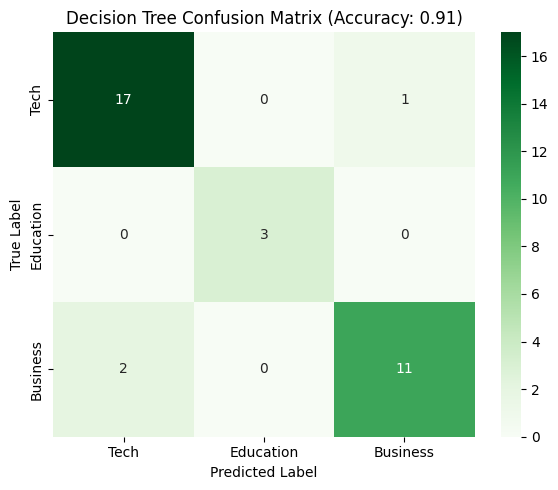

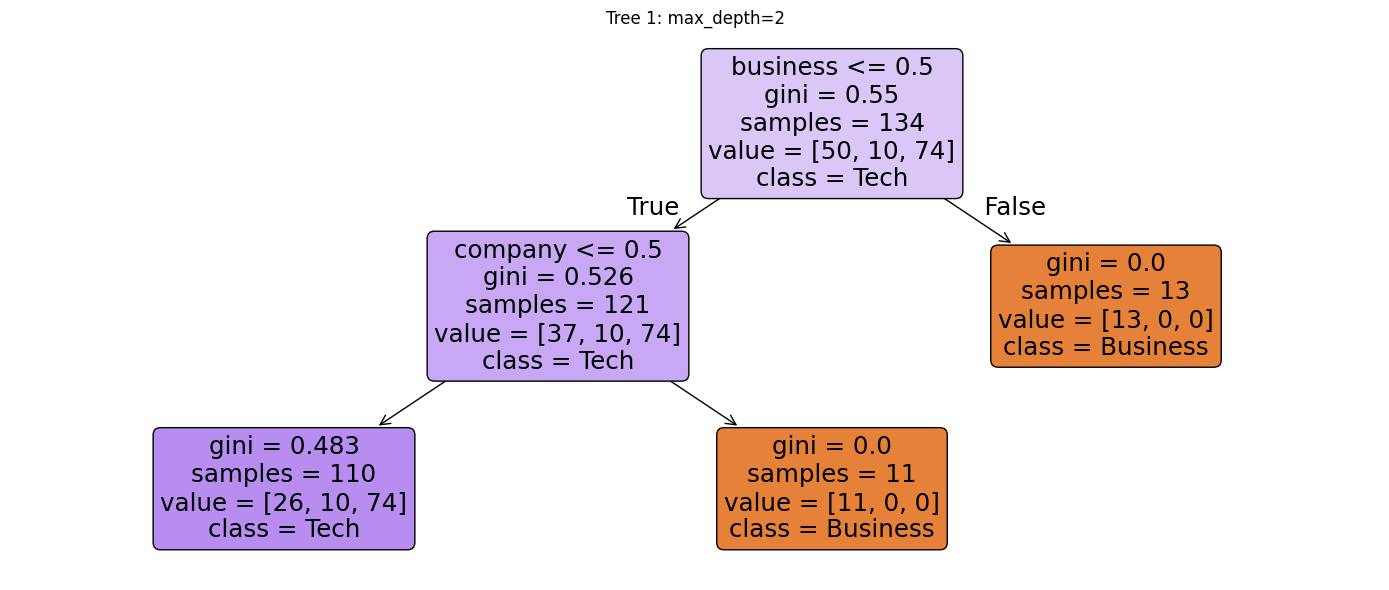

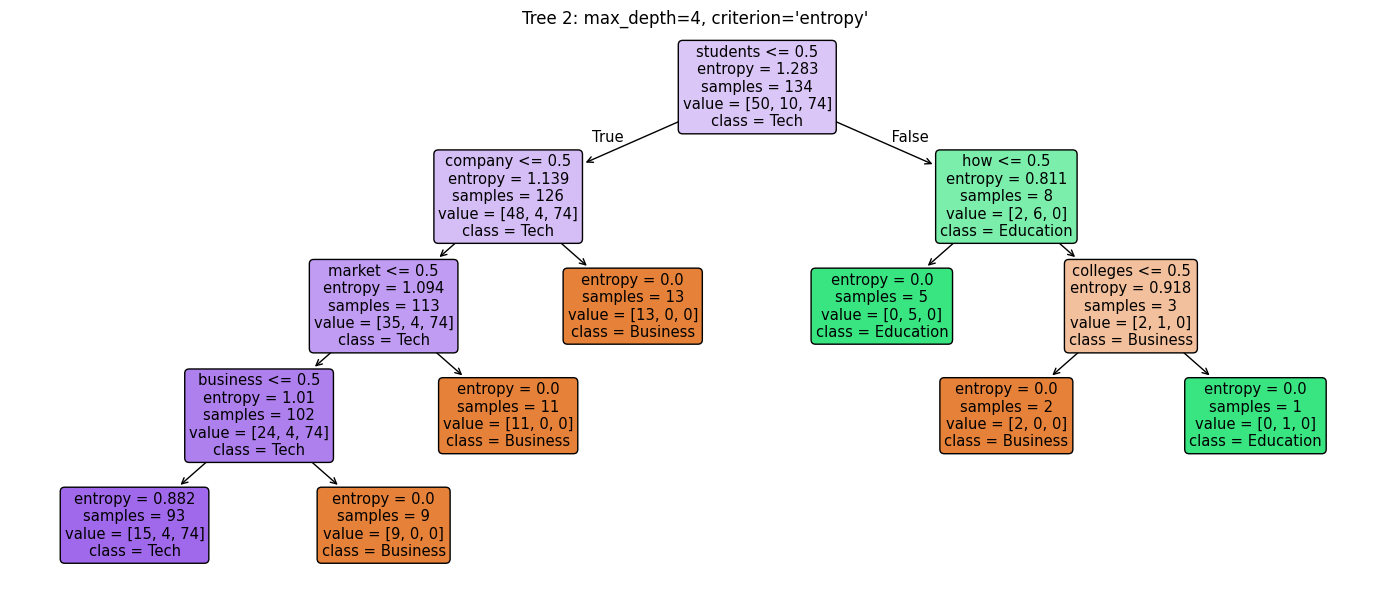

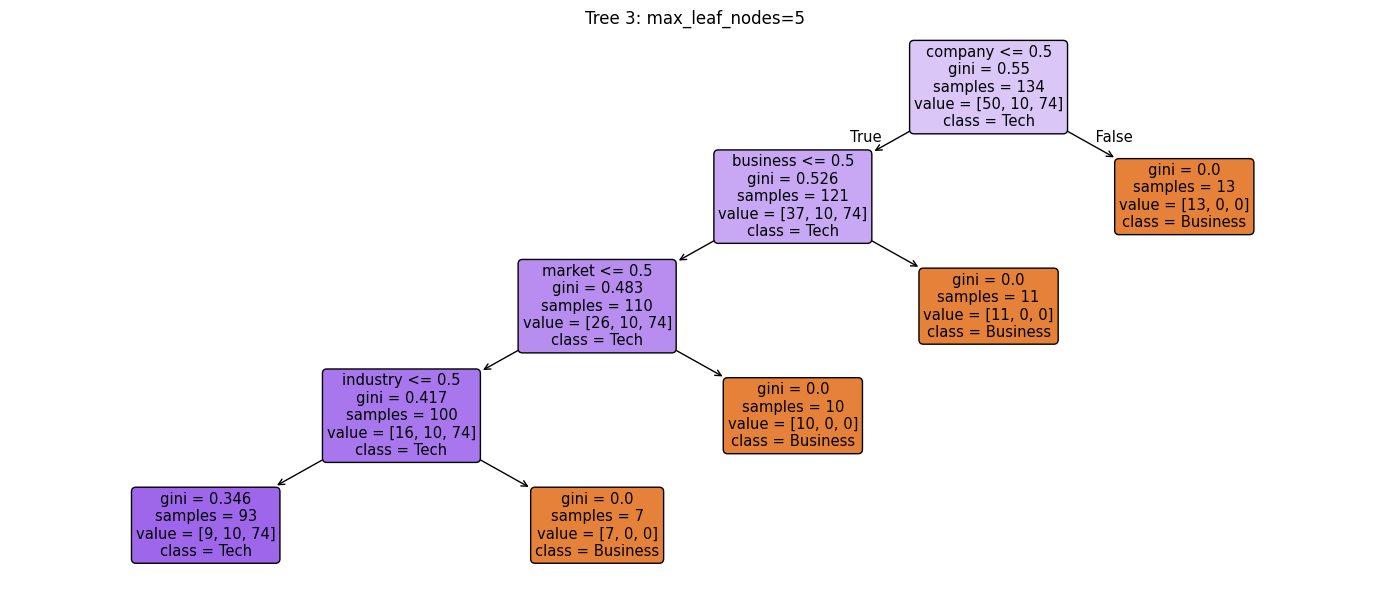

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\Text Mining\Project\labeled_news_dataset.csv")

df['text'] = (df['Title'].fillna('') + ' ' + df['Description'].fillna('')).str.lower()
df['Label'] = 'Unknown'
df.loc[df['text'].str.contains("ai|machine learning|artificial intelligence|automation|robot", regex=True), 'Label'] = 'Tech'
df.loc[df['text'].str.contains("school|university|student|education|curriculum|graduates", regex=True), 'Label'] = 'Education'
df.loc[df['text'].str.contains("business|company|market|economy|industry|finance|startup", regex=True), 'Label'] = 'Business'
df = df[df['Label'] != 'Unknown']

X = df['text']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_vec, y_train)

y_pred = dt_model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=['Tech', 'Education', 'Business'])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Tech', 'Education', 'Business'],
            yticklabels=['Tech', 'Education', 'Business'])
plt.title(f'Decision Tree Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

tree_configs = [
    ("Tree 1: max_depth=2", DecisionTreeClassifier(max_depth=2, random_state=1)),
    ("Tree 2: max_depth=4, criterion='entropy'", DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=2)),
    ("Tree 3: max_leaf_nodes=5", DecisionTreeClassifier(max_leaf_nodes=5, random_state=3))
]

for title, clf in tree_configs:
    clf.fit(X_train_vec, y_train)
    plt.figure(figsize=(14, 6))
    plot_tree(clf,
              filled=True,
              feature_names=vectorizer.get_feature_names_out(),
              class_names=clf.classes_,
              rounded=True,
              max_depth=5)
    plt.title(title)
    plt.tight_layout()
    plt.show()
